<a href="https://colab.research.google.com/github/LadyPary/HousePricingPrediction/blob/main/House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center> House Pricing Prediction Using Regression  </center>**

##### <center>Zahra Rabbany Khorasgani</center>
<center>610398124</center>
<center>parisa.rabbany.pr@gmail.com</center>

##### <center>Department of Computer Science, Tehran University</center>

##### <center> Statistical Methods </center>

##### <center>Prof. Hasan Misaii </center>

##### <center>Jul. 16, 2021</center>




[Link to this online interactive notebook on Google Colab.](https://colab.research.google.com/drive/1yHmt06ZM54h1oL8lUr6Vf0aG0XXeHaNz?usp=sharing)

**Goal**: Predicting the sales price for each house using the predictor variables.


# **1. Data  Eploration**
In this section we first load the train and test datasets, then explore the data and summarize their characteristics.

In [ ]:
# importing basic common libraries
import math 
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [ ]:
# loading data
def load_data(train = True): 
  ''' Returns train or test data ''' 
  if train: 
    df = pd.read_csv('https://raw.githubusercontent.com/LadyPary/HousePricingRegression/main/train.csv')
  else:
    df = pd.read_csv('https://raw.githubusercontent.com/LadyPary/HousePricingRegression/main/test1.csv')
  return df


## 1.1. Data Description

In [ ]:
def data_explore(df): 
  ''' returns information about the input dataframe '''
  
  display(Markdown("##**What does the dataframe look like? First few lines of dataframe:**"))
  print(df.head(), "\n") # what does the dataframe look like?
  display(Markdown('---'))

  display(Markdown("**Size of the Dataset:**"))
  print(df.shape, "\n") # what's size of the dataset? (how many instances we have)
  display(Markdown('---'))

  display(Markdown("**Dataframe Columns:**"))
  print(df.columns, "\n") # what are the columns (features) 
  display(Markdown('---'))

  display(Markdown("**Type of Each Column:**"))
  print(df.info(), "\n" )
  display(Markdown('---'))

  display(Markdown("##**Summary of Features :**"))
  display(Markdown("**Numerical Columns/Features :**"))
  print(df.describe(),"\n") # summary of each feature
  display(Markdown("**Categorical Columns/Feature:**"))
  print(df[["MSZoning", "SaleCondition"]].describe(),"\n")
  display(Markdown('---'))

  display(Markdown("##**Unique Values of Each Categorical Column and Their Counts:**"))
  display(Markdown("**Unique Values of MSZoning:**"))
  print(df["MSZoning"].value_counts(),"\n")
  display(Markdown("**Unique Values of SaleCondition:**"))
  print(df["SaleCondition"].value_counts(),"\n")
  display(Markdown('---'))

  display(Markdown("**Number of Null Values in Dataframe:**"))
  print("Number of Null Values in Dataframe: " )
  print(df.isna().sum())

  return


> Below is the insightful summary of the train data set.

In [ ]:
# exploring the train dataset
df_train = load_data()
data_explore(df_train)

##**What does the dataframe look like? First few lines of dataframe:**

   Id  MSSubClass MSZoning  LotArea SaleCondition  SalePrice
0   1          60       RL     8450        Normal     208500
1   2          20       RL     9600        Normal     181500
2   3          60       RL    11250        Normal     223500
3   4          70       RL     9550       Abnorml     140000
4   5          60       RL    14260        Normal     250000 



---

**Size of the Dataset:**

(1460, 6) 



---

**Dataframe Columns:**

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'SaleCondition',
       'SalePrice'],
      dtype='object') 



---

**Type of Each Column:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   SaleCondition  1460 non-null   object
 5   SalePrice      1460 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 68.6+ KB
None 



---

##**Summary of Features :**

**Numerical Columns/Features :**

                Id   MSSubClass        LotArea      SalePrice
count  1460.000000  1460.000000    1460.000000    1460.000000
mean    730.500000    56.897260   10516.828082  180921.195890
std     421.610009    42.300571    9981.264932   79442.502883
min       1.000000    20.000000    1300.000000   34900.000000
25%     365.750000    20.000000    7553.500000  129975.000000
50%     730.500000    50.000000    9478.500000  163000.000000
75%    1095.250000    70.000000   11601.500000  214000.000000
max    1460.000000   190.000000  215245.000000  755000.000000 



**Categorical Columns/Feature:**

       MSZoning SaleCondition
count      1460          1460
unique        5             6
top          RL        Normal
freq       1151          1198 



---

##**Unique Values of Each Categorical Column and Their Counts:**

**Unique Values of MSZoning:**

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 



**Unique Values of SaleCondition:**

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64 



---

**Number of Null Values in Dataframe:**

Number of Null Values in Dataframe: 
Id               0
MSSubClass       0
MSZoning         0
LotArea          0
SaleCondition    0
SalePrice        0
dtype: int64


> Below is the insightful summary of the test data set. We explore the test dataset (here and in the next step) to make sure features in train and test datasets dont have different distributions.

In [ ]:
# exploring the test dataset to make sure the train set is representetive of the test set
df_test = load_data(train = False)
data_explore(df_test)

##**What does the dataframe look like? First few lines of dataframe:**

   Unnamed: 0  Id  MSSubClass MSZoning  LotArea SaleCondition  SalePrice
0           0  16          45       RM     6120        Normal     132000
1           1  23          20       RL     9742        Normal     230000
2           2  25          20       RL     8246        Normal     154000
3           3  30          30       RM     6324        Normal      68500
4           4  35         120       RL     7313        Normal     277500 



---

**Size of the Dataset:**

(191, 7) 



---

**Dataframe Columns:**

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotArea',
       'SaleCondition', 'SalePrice'],
      dtype='object') 



---

**Type of Each Column:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     191 non-null    int64 
 1   Id             191 non-null    int64 
 2   MSSubClass     191 non-null    int64 
 3   MSZoning       191 non-null    object
 4   LotArea        191 non-null    int64 
 5   SaleCondition  191 non-null    object
 6   SalePrice      191 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 10.6+ KB
None 



---

##**Summary of Features :**

**Numerical Columns/Features :**

       Unnamed: 0           Id  MSSubClass        LotArea      SalePrice
count    191.0000   191.000000  191.000000     191.000000     191.000000
mean      95.0000   733.041885   60.445026   11090.502618  182581.209424
std       55.2811   425.509698   44.758838   14298.710888   79571.133711
min        0.0000    16.000000   20.000000    1300.000000   64500.000000
25%       47.5000   360.000000   20.000000    7200.000000  131750.000000
50%       95.0000   717.000000   60.000000    9600.000000  162500.000000
75%      142.5000  1107.500000   80.000000   11520.500000  210900.000000
max      190.0000  1453.000000  190.000000  159000.000000  555000.000000 



**Categorical Columns/Feature:**

       MSZoning SaleCondition
count       191           191
unique        5             6
top          RL        Normal
freq        151           150 



---

##**Unique Values of Each Categorical Column and Their Counts:**

**Unique Values of MSZoning:**

RL         151
RM          28
FV           6
RH           5
C (all)      1
Name: MSZoning, dtype: int64 



**Unique Values of SaleCondition:**

Normal     150
Partial     19
Abnorml     17
Family       3
Alloca       1
AdjLand      1
Name: SaleCondition, dtype: int64 



---

**Number of Null Values in Dataframe:**

Number of Null Values in Dataframe: 
Unnamed: 0       0
Id               0
MSSubClass       0
MSZoning         0
LotArea          0
SaleCondition    0
SalePrice        0
dtype: int64


> Key Notes:
1. Test dataset has a column named "Unnamed" which is a copy of row number col (index) and should be dropped in the preprocessing step. 
2. There are 2 categorical features, **MSZoning** and **SaleCondition**. We need to use One-Hot Encoding (dummy variables) for these two in the preprocessing step.
3. Both train and test datasets don't have any Null values.
4. Categorical columns in both train and test datasets have the same unique values which ensures us that the One-Hot Encoding would work fine.

# **2. Data Analysis**
In this section we first visualize the data using histograms, then compute the Pearson correlation for each pair of variables.
After that we plot the scatter matrix and boxplots to further our understanding on this dataset.

## 2.1. Data Visualization

In [ ]:
%matplotlib inline

def histogram(df):
  df.hist(bins=50, figsize=(20,15))
  #save_fig("attribute_histogram_plots")
  plt.show()
  return

# dropping the columns we doent need
df_train.drop(['Id'], axis = 1, inplace=True) 
df_test.drop(['Unnamed: 0' , 'Id'], axis = 1, inplace=True)


#**<center>Histograms for the *train* dataset**

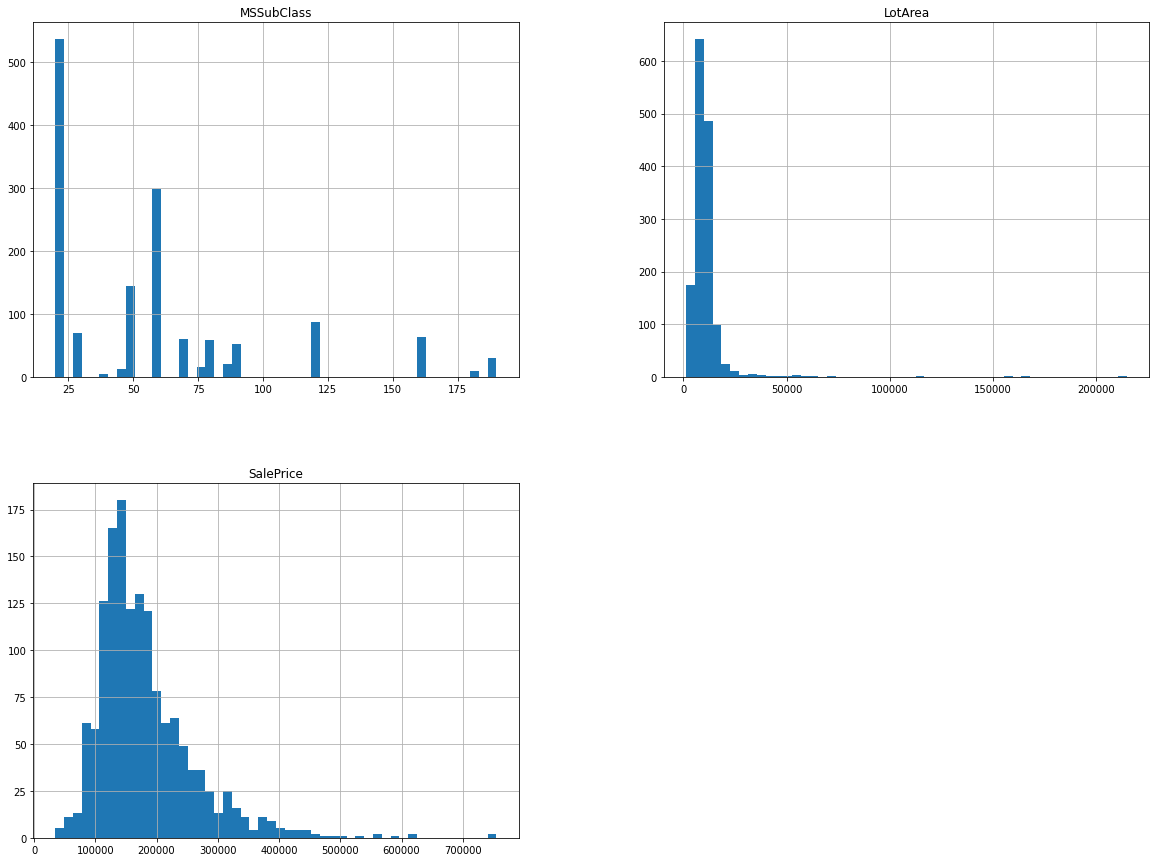

In [ ]:
# histograms for train dataset

display(Markdown("#**<center>Histograms for the *train* dataset**"))
histogram(df_train)


#**<center>Histograms for the *test* dataset**

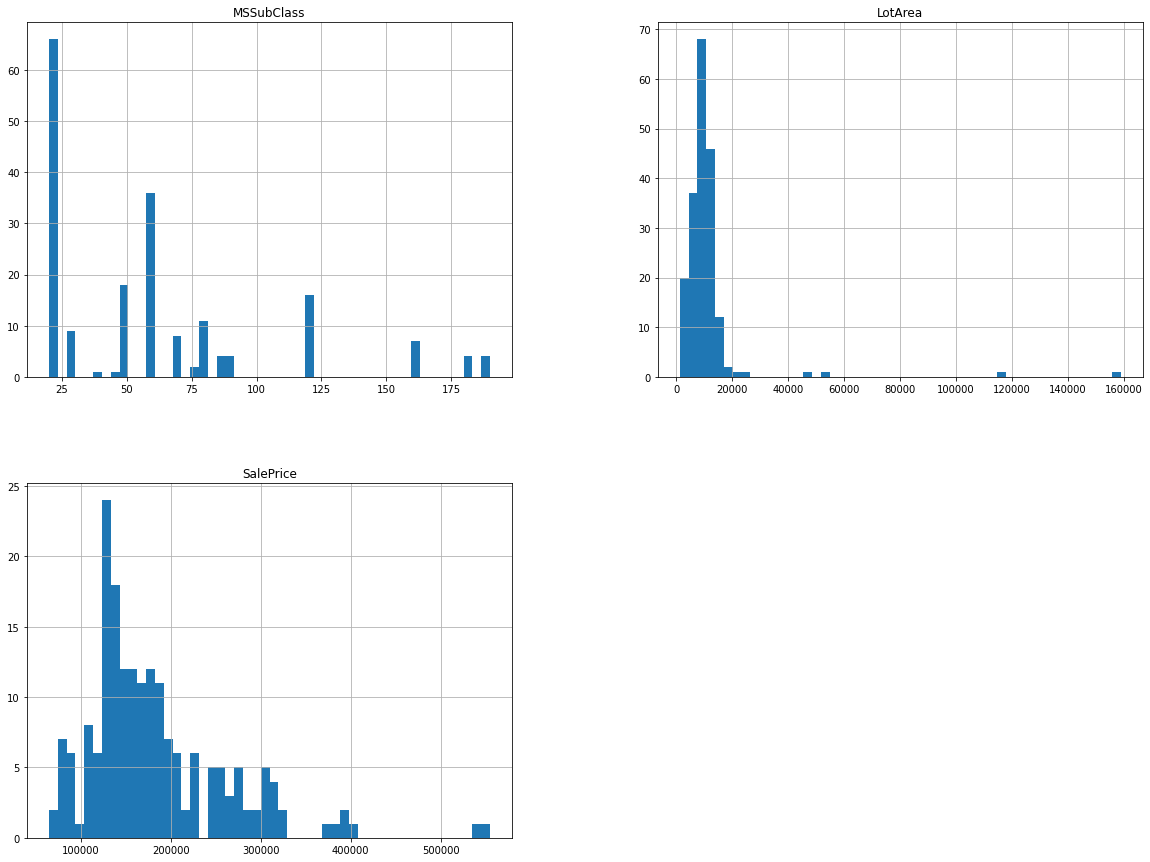

In [ ]:
# histograms for test dataset
display(Markdown("#**<center>Histograms for the *test* dataset**"))
histogram(df_test)

> What we can see in above histograms is that features don't follow a normal distribution and display a right-skewed distribution! Also, variables of train and test dataset represent similar distributions.

## 2.2. Correlations 
We look for possible correlations between our variables with the use of Pearson correlation coefficient and visualisation.




##**<center>Pairwise Coefficients of Correlation Between Features**

            MSSubClass   LotArea  SalePrice
MSSubClass    1.000000 -0.139781  -0.084284
LotArea      -0.139781  1.000000   0.263843
SalePrice    -0.084284  0.263843   1.000000


##**<center>Pairwise Plots of Correlation Between Features**

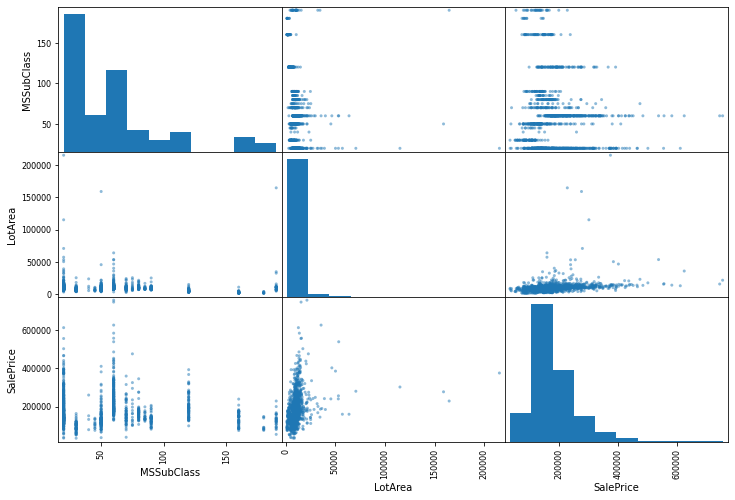

In [ ]:
from pandas.plotting import scatter_matrix

def plot_cor(df): 
  ''' Returns the correlation plots of a dataframe '''
  corr_matrix = df.corr()
  print(corr_matrix)
  attributes = df.columns
  scatter_matrix(df[attributes], figsize=(12, 8))
  return
display(Markdown("##**<center>Pairwise Coefficients of Correlation Between Features**"))

plot_cor(df_train)
display(Markdown("##**<center>Pairwise Plots of Correlation Between Features**"))


> As we can see the coefficients of correlation between **MSSubClass** and **SalePrice** is very close to zero (-0.084284), so this feature might not have a predictive power and could be dropped in the preprocessing step. However, we keep this variable (as we have a very few dependent variables) and will determine the predictive power of this variable in the next steps with feature importance function.

##**<center>Scatter Plots of SalePrice vs Independent Variables**

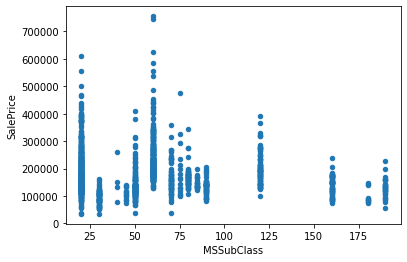

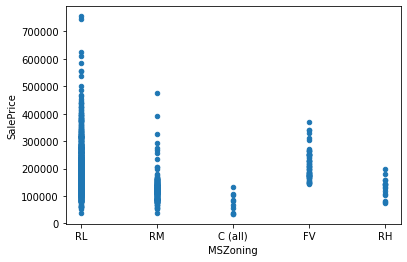

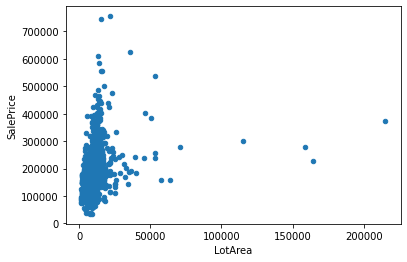

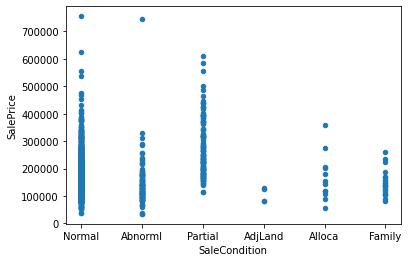

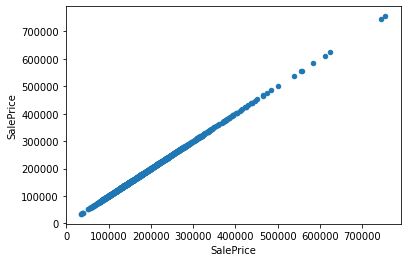

In [ ]:
def plot_scatter(df,x): 
  ''' x is the feature '''
  df.plot(kind="scatter", x=x, y="SalePrice")
  return
  
for i in df_train.columns:
  plot_scatter(df_train,i)

display(Markdown("##**<center>Scatter Plots of SalePrice vs Independent Variables**"))


> We cannot see a linear relation between sales price and other variables in above plots. Thus it comes to mind that linear regression might not be the best model for this prediction.

## 2.4. Data Preprocessing
Data preprocessing is an important step in the data mining and machine learning process. 

As they say **"garbage in, garbage out"** 

We *clean* our data by:

1.   Looking for and handling **missing values** if there are any.
2.   Looking for and handling **outliers** if there are any.
2.   Encoding **categorical values**.
3.   **Scalling** the features.


#### 2.4.1 Handling Missing values

In [ ]:
# handeling null values if there's any
sample_incomplete_rows = df_train[df_train.isnull().any(axis=1)].head() # checking for Null values again!
print(sample_incomplete_rows) # no Null

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotArea, SaleCondition, SalePrice]
Index: []


> There is no Null value in our train dataset, but if there was we would handle it using one of the below methods:
1. Deleting Rows (not recommended because of the loss of information and data, especially when we dont have a large dataset),
2. Replacing With Mean/Median/Mode
3. Assigning An Unique Category,
4. Predicting The Missing Values, or
5. Using Algorithms Which Support and handle Missing Values like tree based algorithms.







#### 2.4.2 Dropping Outliers
We use boxplot to check for outliers. When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.

##**<center>Outliers in MSSubClass**

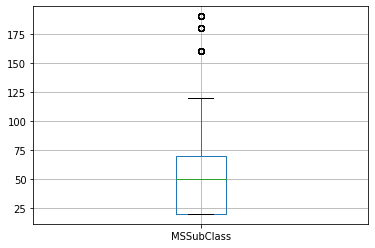

In [ ]:
# finding outliers using boxplots

df_train = load_data()
df_train.boxplot(column=["MSSubClass"])
display(Markdown("##**<center>Outliers in MSSubClass**"))


##**<center>Outliers in LotArea**

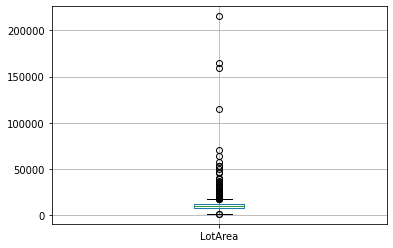

In [ ]:
df_train.boxplot(column=["LotArea"])
display(Markdown("##**<center>Outliers in LotArea**"))


##**<center>Outliers in SalePrice**

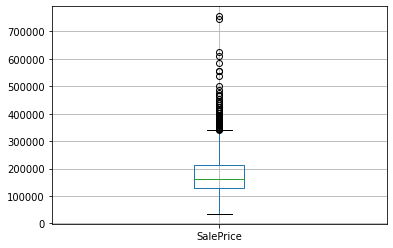

In [ ]:
df_train.boxplot(column=["SalePrice"])
display(Markdown("##**<center>Outliers in SalePrice**"))


##**<center>Outliers in SalePrice of the Test Dataset**

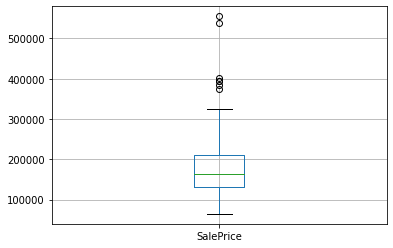

In [ ]:
df_test.boxplot(column=["SalePrice"])
display(Markdown("##**<center>Outliers in SalePrice of the Test Dataset**"))




> If there are outliers in the data, they should not be removed or ignored without a good reason. Whatever final model is fit to the data would not be very helpful if it ignores the most exceptional cases. Since we have considerable number of outliers in the test dataset, removing the outliers from the train dataset would harm the predictor model.





#### 2.4.3 Encoding categorical values


In many Machine-learning or Data Science activities, the data set might contain text or categorical values. Few algorithms such as can handle categorical values very well but most of the algorithms expect numerical values to achieve the reliable results.

We use the **dummy variables** which is a numerical variable used in regression analysis to represent subgroups of the sample in the study. 


In [ ]:
# handeling categorical values

def encoding(df):
  dft = df
  MSZoning = pd.get_dummies(dft['MSZoning']) # using dummy variables for MSZoning and SaleCondition
  SaleCondition = pd.get_dummies(dft['SaleCondition'])
  dft = pd.concat([MSZoning, SaleCondition,dft], axis=1)
  dft.drop(columns=['MSZoning','SaleCondition'], inplace=True)  
  dft.columns
  return dft

#### 2.4.4 Scalling the Features

Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Having features on a similar scale can help the gradient descent converge more quickly towards the minima. tree-based algorithms on the other hand, are fairly insensitive to the scale of the features.

There are two ways for feature scaling:

1. Normalization *(MinMaxScaler)*

  $ X'=\frac{X-X_{min}}{X_{max} -X_{min}} $

2. Standardization *(StandardScaler)*

  $X'=\frac{X-\mu }{\sigma }$

We use the first method because normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. And as we saw in the first section, it doesn not.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def preprocess():
  '''Performs the necessary preprocessing of data'''
  df_train = load_data()
  df_train.drop(['Id'], axis = 1, inplace=True)
  df_test = load_data(train = False)
  df_test.drop(['Unnamed: 0' , 'Id'], axis = 1, inplace=True)
  df_train  = encoding(df_train)
  df_test = encoding(df_test)

  y_train = df_train.loc[:, 'SalePrice']
  X_train = df_train.drop(columns=['SalePrice'])
  print(X_train.columns)

  y_test = df_test.loc[:, 'SalePrice']
  x_test = df_test.drop(columns=['SalePrice'])
  #print(X_train.shape, y_train.shape)
  #print(X_test.shape, y_test.shape)
  
  scaler = MinMaxScaler() 
  #scaler = StandardScaler()
  scaler.fit(X_train) # scalling the features (x_train)
  X_train = scaler.transform(X_train)
  x_test = scaler.transform(x_test)
  return X_train, x_test , y_train, y_test

# **3. Model Training**
In this section we first train the model, which is learning (determining) good values for all the weights and the bias from samples. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss. Since this is supervised learning we try different models and train them on our dataset, we then use the test dataset to calculate the **RMSE(Root Mean Square Error)** and compare different regression models in terms of accuracy.

  $RMSE=\sqrt{\frac{\sum\limits _{i=1}^{n}( y_{i} -\overline{y})^{2}}{n}}$

In [ ]:
from sklearn.metrics import mean_squared_error
def get_model_acc(model, test_x, test_y):
  '''Returns the RMSE of the model'''
  y_pred = model.predict(test_x)
  return mean_squared_error(test_y, y_pred)

####**Description of each model:**

1. **Linear Regression:** Linear regression is a linear model, that assumes a linear relationship between the input variables and the single output variable. And that output can be calculated from a linear combination of the input variables.

2. **Decision Tree Regression:** Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches, each representing values for the attribute tested. Leaf node represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 	

3. **Random Forest Regression:** Random forest is a type of supervised learning algorithm that uses ensemble methods (bagging) to solve both regression and classification problems. The algorithm operates by constructing a multitude of decision trees at training time and outputting the mean/mode of prediction of the individual trees.


4. **Support Vector Machine (SVM):** SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

5. **Extreme Gradient Boost Regression (XGBoost):** Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems. Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting. Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.






####**Model selection:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

X_train, x_test , y_train, y_test = preprocess()
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
svm_reg = SVR(kernel="linear")
xgboost = xgb.XGBRegressor(objective='reg:squarederror')
rmse = []
dic = {"LinearRegression":lin_reg, "DecisionTreeRegressor":tree_reg ,"RandomForestRegressor":forest_reg ,"SVM": svm_reg, "XGBRegressor": xgboost}
for k,v in dic.items():
 # print (k,v)
  model = v
  model.fit(X_train, y_train)
  display(Markdown("**Root mean square error using: {}**".format(k)))
  print(math.sqrt(get_model_acc(model, x_test, y_test)))

Index(['C (all)', 'FV', 'RH', 'RL', 'RM', 'Abnorml', 'AdjLand', 'Alloca',
       'Family', 'Normal', 'Partial', 'MSSubClass', 'LotArea'],
      dtype='object')


**Root mean square error using: LinearRegression**

67006.41302171494


**Root mean square error using: DecisionTreeRegressor**

9650.22344618717


**Root mean square error using: RandomForestRegressor**

27112.895606234197


**Root mean square error using: SVM**

81636.07528974858


**Root mean square error using: XGBRegressor**

51496.973227996416


> **Decision Tree Regressor** is the best model with the root mean square error of $9650.22344618717$.

## 3.1. Predictions
We use the best model we found which was **Decision Tree Regressor** on the test dataset to predict the house price according to the features.

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
X_train, x_test , y_train, y_test = preprocess()
tree_reg.fit(X_train, y_train)
acc = get_model_acc(tree_reg, x_test, y_test)
display(Markdown("**Root mean square error using Decision Tree Regressor:**"))
print(math.sqrt(acc))
y_pred = model.predict(x_test)
y_pred.tolist()
print(type(y_test))
y_test = y_test.to_frame()
y_test.drop("SalePrice", axis =1, inplace = True)
y_test["predicted_SalePrice"] = y_pred.tolist()
print(y_test)

# Saving the predictions as csv file
y_test.to_csv('prediction_results.csv')


Index(['C (all)', 'FV', 'RH', 'RL', 'RM', 'Abnorml', 'AdjLand', 'Alloca',
       'Family', 'Normal', 'Partial', 'MSSubClass', 'LotArea'],
      dtype='object')


**Root mean square error using Decision Tree Regressor:**

9650.22344618717
<class 'pandas.core.series.Series'>
     predicted_SalePrice
0          107725.234375
1          163639.421875
2          144429.468750
3           93584.406250
4          211799.406250
..                   ...
186        327817.031250
187        250643.796875
188        124053.000000
189         92171.234375
190        118837.882812

[191 rows x 1 columns]


> *tree_reg* is the trained model that we use to make predictions. We can save this model (as well as the scaler) to use in the future to make predictions for new data points. If we call the model it displays all the model parameters (see below) which are the default values here. These parameters can be tuned via **hyperparameter tuning**, however we did not tuned the model as we achieved the desired accuracy.

In [ ]:
tree_reg


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

####**Feature importance:**
We can determine the predictive power of each variable in the model with feature importance function.

Below is the ranked list of the features along with their feature importance. 

In [ ]:
feat_import = tree_reg.feature_importances_
f = ('C (all)', 'FV', 'RH', 'RL', 'RM', 'Abnorml', 'AdjLand', 'Alloca','Family', 'Normal', 'Partial', 'MSSubClass', 'LotArea')
z = list(zip(f ,feat_import))

res = sorted(z, key = lambda x: x[1],reverse=True)

display(Markdown("###**Feature  , Feature Importance**"))
for item in res:
  print(item, "\n")


###**Feature  , Feature Importance**

('LotArea', 0.6756216315600458) 

('MSSubClass', 0.14991083290963222) 

('Partial', 0.10343324235089287) 

('RM', 0.036733403529597565) 

('Normal', 0.007743981208980061) 

('FV', 0.007021055676174267) 

('RL', 0.00606041524995017) 

('Abnorml', 0.005334769645430208) 

('C (all)', 0.0031320156647837985) 

('Alloca', 0.0027393604835920736) 

('RH', 0.0012656652456041757) 

('Family', 0.0008053213605600957) 

('AdjLand', 0.0001983051147567593) 



> We can see that **LotArea** has the most predictive power in the model, following with **MSSubClass** and other variables.

> We should note that although the MSSubClass had a low correlation with $y$ variable, it comes second in the feature importance list, proving that it was a good call to keep the variable and not drop it in the preprocessing step.



## 3.2. Conclusion
Different datasets require different data preprocessing and modeling. 

For this problem's dataset we can sort the different regression models according to their accuracy using RMSE:

1.   Decision Tree Regressor ***(Best)***
2.   Random Forest Regressor
3.   XGB Regressor
4. LinearRegression
5. SVM ***(Worst)***

Also using the feature importance method, we understood that **LotArea** and **MSSubClass** are the two most powerful variable for predicting the house sale's price.